# Premiere Calibration en FCS avec des billes fluos et le x20 0.75

On met les outils en place...

Nous avons deux types de billes des 30nm et des 100nm


In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

import os
import sys

py_SPC_path = os.path.normpath(r"C:\TRAVAIL\recherche\code\pySPC")
print(py_SPC_path)
sys.path.insert(0, py_SPC_path)

from core import Experiment

Populating the interactive namespace from numpy and matplotlib
C:\TRAVAIL\recherche\code\pySPC


In [14]:
datapath = r"C:\Users\MatthieuL\Documents\data\2018_10_24_TestFCS_BillesFluo"
filepath_100nm = r"BilleFluo100nano_c0sur500_x20_DichroBPLP405_Pinc_Fibre25.spc"
filepath_30nm = r"BilleFluo30nano_c0sur10000_x20_DichroBPLP405_Pmax_Fibre25.spc"

## Calcul des courbes de corrélations

Il vaut mieux les calculer une fois pour toute dans une seule cellule du notebokk, pour ne pas avoir à les recalculer en permanence.

In [15]:
filepath_100nm = os.path.normpath(os.path.join(datapath, filepath_100nm))  
exp_100nm = Experiment.Experiment(filepath_100nm)
exp_100nm.FCS()

filepath_30nm = os.path.normpath(os.path.join(datapath, filepath_30nm))  
exp_30nm = Experiment.Experiment(filepath_30nm)
exp_30nm.FCS()


## Affichage des courbes

Il faut faire attention à l'after pulsing qui est assez présent, du coup, on affiche à partir de 10 µs

Les résultats de la correlations se trouve dans l'objet CorrelationMeasurement que l'on retrouve dans la partie "result" de l'objet experiment ce qui donne en code :
exp_100nm.results.FCS_Measurements[0]



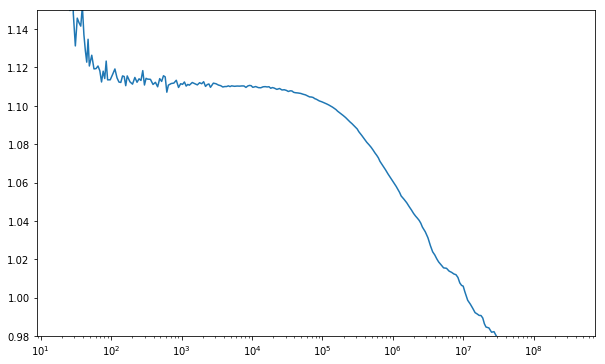

In [22]:
FCS_curve = exp_100nm.results.FCS_Measurements[0].data
FCS_time_axis = exp_100nm.results.FCS_Measurements[0].time_axis

plt.semilogx(FCS_time_axis, FCS_curve)
plt.ylim(0.98,1.15)
plt.show()


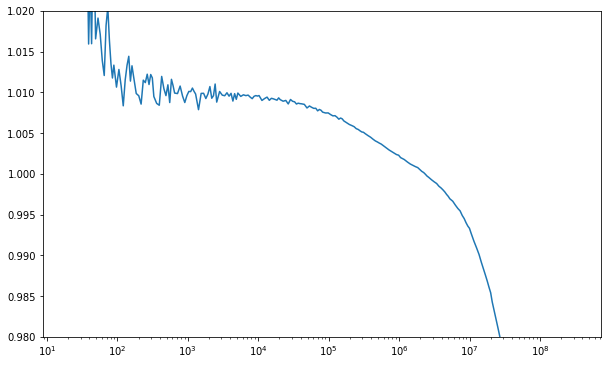

In [21]:
FCS_curve = exp_30nm.results.FCS_Measurements[0].data
FCS_time_axis = exp_30nm.results.FCS_Measurements[0].time_axis

plt.semilogx(FCS_time_axis, FCS_curve)
plt.ylim(0.98,1.02)
plt.show()


## Affichage plus standardisée

J'ai écrtis une fonction dans pySPC pour zvoir un graphe "canonique"

## Analyse des données

Tout d'abord les temps de corrélations sont *très longs*

Cela est assez normal car avec le x20 l'ouverture numérique n'est que de 0.75, ce qui donne à la limite de diffraction une *tache d'Airy* $d_{\text{Airy}}$ de :
$$
d_{\text{Airy}} = \dfrac{1.22 \lambda}{NA} = \dfrac{1.22 405}{0.75} =  650nm
$$
que l'on peut alors relier à un waist $w$ (largeur pour laquelle l’intensité est égale à $1/e^2$ de la valeur maximum), via un fit gaussien, de :
$$
w_{xy} =
$$

Il faut alors s'attendre à un temps de diffusion $\tau_D$ de l'ordre de :
$$
\tau_D = \dfrac{w_{xy}^2}{4 D}
$$
avec pour le coefficient de diffusion $D£ :
$$
D = \dfrac{k_B T}{\mu} = \dfrac{k_B T}{6 \pi \eta r} 
$$
ce qui donne pour les sphères de 30nm D_{30} = 




